In [1]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt

In [2]:
#The Defines
BLD_PATH = 'images/bld.tif'
KERNEL = np.array([[-1, -1,-1]
                  ,[-1, 8, -1]
                  ,[-1, -1, -1]])
FILTER_SIZE = KERNEL.shape[0]
BORDER_TYPE = cv2.BORDER_CONSTANT

In [3]:
## Functions

def filter_img(dst_img, KERNEL, FILTER_SIZE): # This function if for filtering the image that we gave to it
    res_img = np.zeros((dst_img.shape[0] - FILTER_SIZE + 1, dst_img.shape[1] - FILTER_SIZE + 1))
    for i in range(dst_img.shape[0] - FILTER_SIZE + 1):
        for j in range(dst_img.shape[1] - FILTER_SIZE + 1):
            res_img[i,j] = np.sum((KERNEL * dst_img[i:i + FILTER_SIZE, j:j + FILTER_SIZE]))
    return res_img

In [4]:
# we read the data that we have
Bld_img = cv2.imread(BLD_PATH, 0) 

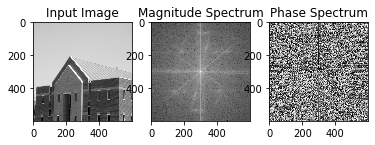

In [5]:
# We calcualte the dft pf the image that we have 
DFT = cv2.dft(np.float32(Bld_img),flags = cv2.DFT_COMPLEX_OUTPUT)
DFT_shift = np.fft.fftshift(DFT)
Mag, Phase = cv2.cartToPolar(DFT_shift[:,:,0], DFT_shift[:,:,1], angleInDegrees=0)
# We plot the result that we have
plt.subplot(131),plt.imshow(Bld_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(132), plt.imshow(20 * np.log(Mag), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(Phase, cmap = 'gray')
plt.title('Phase Spectrum')
plt.show()

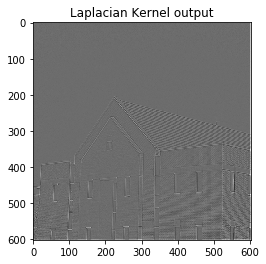

In [6]:
# after applying the laplcaian filter we are going to see the output result of the job that we have done
src = Bld_img
top = (FILTER_SIZE - 1) 
bottom = top
left = (FILTER_SIZE - 1)
right = left
# because that we are filtering the data we need to zero pad the image we have so in this case we will make the image size as the
# the same of what we want
dst_img = cv2.copyMakeBorder(src, top, bottom, left, right, BORDER_TYPE, None, 0)
conv_img = filter_img(dst_img, KERNEL, FILTER_SIZE)
# In the end we are going to plot the reuslt 
plt.imshow(conv_img, cmap = 'gray')
plt.title('Laplacian Kernel output')
plt.show()

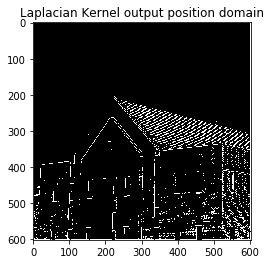

In [7]:
# we also are going to define a threshold in order to decalre if the out put is larger than that
# it will become 255 else it will be 0
plt.imshow(255 * (conv_img > 70) , cmap = 'gray')
plt.title('Laplacian Kernel output position domain')
plt.show()

In [8]:
# This part we are using the zero pad in order to filter in image in position domain
top = int(np.floor((src.shape[0] - KERNEL.shape[0])/2))
bottom = int(np.ceil((src.shape[0] - KERNEL.shape[0])/2))
left = int(np.floor((src.shape[1] - KERNEL.shape[1])/2))
right = int(np.ceil((src.shape[1] - KERNEL.shape[1])/2))
dst_img = cv2.copyMakeBorder(KERNEL, top, bottom, left, right, BORDER_TYPE, None, 0.00001)
print(dst_img.shape)

(600, 600)


C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


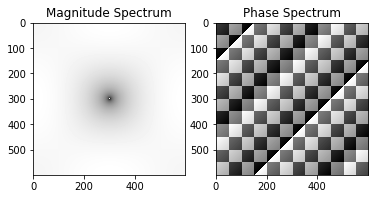

In [9]:
# In this part we calculate the frequency domain of the filter tjat we have and plot it in the end
DFT = cv2.dft(np.float32(dst_img),flags = cv2.DFT_COMPLEX_OUTPUT)
DFT_shift = np.fft.fftshift(DFT)
Mag_filter, Phase_filter = cv2.cartToPolar(DFT_shift[:,:,0], DFT_shift[:,:,1], angleInDegrees=0)
# Here is the plot of it
plt.subplot(121), plt.imshow(20 * np.log(Mag_filter), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.subplot(122), plt.imshow(Phase_filter, cmap = 'gray')
plt.title('Phase Spectrum')
plt.show()

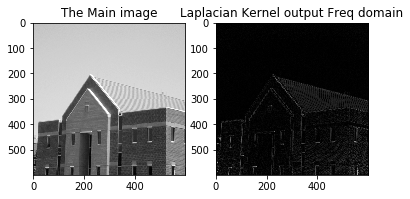

In [10]:
after_filter = (Mag_filter * Mag)
# We will apply the mask we have build before to the image
rows, cols = src.shape
New_DFT_C = np.zeros((rows,cols,2),np.float32)
New_DFT_C[:,:,0] = after_filter * np.cos(Phase)
New_DFT_C[:,:,1] = after_filter * np.sin(Phase)
f_ishift = np.fft.ifftshift(New_DFT_C)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# In the end we will plot the result as well
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('The Main image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Laplacian Kernel output Freq domain')
plt.show()